<div style="background-color: #013a63; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Module 5 Project - I’m Something of a Painter Myself
</div>

<div style="background-color: magenta; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Predictive, Exploratory and Analytical Questions
</div>

<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Install Dependencies
</div>

In [43]:
#! pip3 install kagglehub
#! pip3 install tensorflow
# !pip install kaggle
#! pip install wordcloud
#! pip install nltk
#! pip install transformers
! pip install tensorflow_datasets 


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   ------------------- -------------------- 2.6/5.3 MB 21.6 MB/s eta 0:00:01
   ---------------------------------------- 5.3/5.3 MB 24.9 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21544 sha256=659473f44b9cf0093a7fd02b6ccc02a34b54765455bc756a8f64afc2d28e8b5d
  Stored in directory: C:\Users\Afiat_Trading\AppData\Local\Temp\pip-ephem-wheel-cache-5e5w6clu\wheels\e7\e6\28\864bdfee5339dbd6ddcb5a186286a8e217648ec198bdf0097d
Successfully built promise


<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Libraries
</div>

In [45]:

from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers, ops
import tensorflow_datasets as tfds

tfds.disable_progress_bar()
autotune = tf.data.AUTOTUNE

os.environ["KERAS_BACKEND"] = "tensorflow"



<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Dataset Description - Monet Dataset
</div>

<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Loading the Dataset and Inspection
</div>

### Loading Data

In [12]:
# Step 1: Download the dataset using Kaggle API

data_dir = Path("data")


# Create data directory if it doesn't exist
data_dir.mkdir(exist_ok=True)

# Download the competition dataset using shell command
# This requires that your Kaggle API credentials are set up correctly
try:
    # Download all files from the competition and unzip

    !kaggle competitions download -c gan-getting-started -p "{data_dir}"
    # Unzip all files in the data directory
    import zipfile
    for file in data_dir.glob("*.zip"):
        with zipfile.ZipFile(file, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
    print("Dataset downloaded and unzipped successfully!")

    # List downloaded files
    print("\nDownloaded files:")
    for file in data_dir.iterdir():
        print(f"- {file.name}")

except Exception as e:
    print(f"Error downloading dataset: {e}")
    print("Make sure you have:")
    print("1. Accepted the competition rules on Kaggle")
    print("2. Set up your Kaggle API credentials correctly")




  0%|          | 0.00/367M [00:00<?, ?B/s]
  0%|          | 1.00M/367M [00:00<00:40, 9.52MB/s]
  5%|▌         | 19.0M/367M [00:00<00:03, 107MB/s] 
 10%|█         | 38.0M/367M [00:00<00:02, 144MB/s]
 14%|█▍        | 52.0M/367M [00:00<00:02, 139MB/s]
 18%|█▊        | 67.0M/367M [00:00<00:02, 145MB/s]
 24%|██▎       | 87.0M/367M [00:00<00:01, 166MB/s]
 29%|██▉       | 106M/367M [00:00<00:01, 177MB/s] 
 35%|███▍      | 128M/367M [00:00<00:01, 192MB/s]
 40%|████      | 147M/367M [00:00<00:01, 182MB/s]
 46%|████▌     | 167M/367M [00:01<00:01, 189MB/s]
 51%|█████     | 186M/367M [00:01<00:00, 191MB/s]
 56%|█████▌    | 205M/367M [00:01<00:00, 179MB/s]
 61%|██████    | 224M/367M [00:01<00:00, 183MB/s]
 67%|██████▋   | 245M/367M [00:01<00:00, 194MB/s]
 72%|███████▏  | 264M/367M [00:01<00:00, 195MB/s]
 77%|███████▋  | 283M/367M [00:01<00:00, 189MB/s]
 83%|████████▎ | 303M/367M [00:01<00:00, 194MB/s]
 88%|████████▊ | 322M/367M [00:01<00:00, 195MB/s]
 93%|█████████▎| 341M/367M [00:02<00:00, 188MB/


Dataset downloaded and unzipped successfully!

Downloaded files:
- gan-getting-started.zip
- monet_jpg
- monet_tfrec
- photo_jpg
- photo_tfrec


In [13]:
MONET_FILENAMES = tf.io.gfile.glob('data/monet_tfrec/*.tfrec')
print('Monet TFRecord Files:', len(MONET_FILENAMES))

PHOTO_FILENAMES = tf.io.gfile.glob('data/photo_tfrec/*.tfrec')
print('Photo TFRecord Files:', len(PHOTO_FILENAMES))

Monet TFRecord Files: 5
Photo TFRecord Files: 20



<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Dataset Inspection and Initial Analysis
</div>

In [28]:
IMAGE_SIZE = [256, 256]

def decode_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = (tf.cast(image, tf.float32) / 127.5) - 1
    image = tf.reshape(image, [*IMAGE_SIZE, 3])
    return image

def read_tfrecord(example):
    tfrecord_format = {
        "image_name": tf.io.FixedLenFeature([], tf.string),
        "image": tf.io.FixedLenFeature([], tf.string),
        "target": tf.io.FixedLenFeature([], tf.string)
    }
    example = tf.io.parse_single_example(example, tfrecord_format)
    image = decode_image(example['image'])
    return image

In [29]:
def load_dataset(filenames, labeled=True, ordered=False):
    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.map(read_tfrecord)
    return dataset

In [30]:
monet_ds = load_dataset(MONET_FILENAMES, labeled=True).batch(1)
photo_ds = load_dataset(PHOTO_FILENAMES, labeled=True).batch(1)

In [31]:
example_monet = next(iter(monet_ds))
example_photo = next(iter(photo_ds))

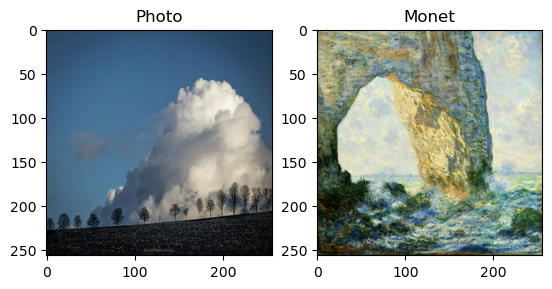

In [32]:
plt.subplot(121)
plt.title('Photo')
plt.imshow(example_photo[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Monet')
plt.imshow(example_monet[0] * 0.5 + 0.5)

In [58]:
# Define the standard image size.
orig_img_size = (256, 256)
# Size of the random crops to be used during training.
input_img_size = (256, 256, 3)

# Weights initializer for the layers.
kernel_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
# Gamma initializer for instance normalization.
gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

In [50]:

ROOT='data'

monet_ds = keras.utils.image_dataset_from_directory(
    ROOT + '/monet_jpg',
    label_mode=None,
    batch_size=1,
    image_size=(256, 256),
)

photo_ds = keras.utils.image_dataset_from_directory(
    ROOT + '/photo_jpg',
    label_mode=None,
    batch_size=1,
    image_size=(256, 256),
)

monet_ds = monet_ds.cache()
photo_ds = photo_ds.cache()
monet_ds = monet_ds.prefetch(tf.data.AUTOTUNE)
photo_ds = photo_ds.prefetch(tf.data.AUTOTUNE)

Found 300 files.
Found 7038 files.
Found 7038 files.


In [51]:
def display_samples(ds, row, col):
    ds_iter = iter(ds)
    plt.figure(figsize=(15, int(15*row/col)))
    for j in range(row*col):
        example_sample = next(ds_iter)
        plt.subplot(row,col,j+1)
        plt.axis('off')
        plt.imshow(example_sample.numpy().astype('int32')[0])
    plt.show()

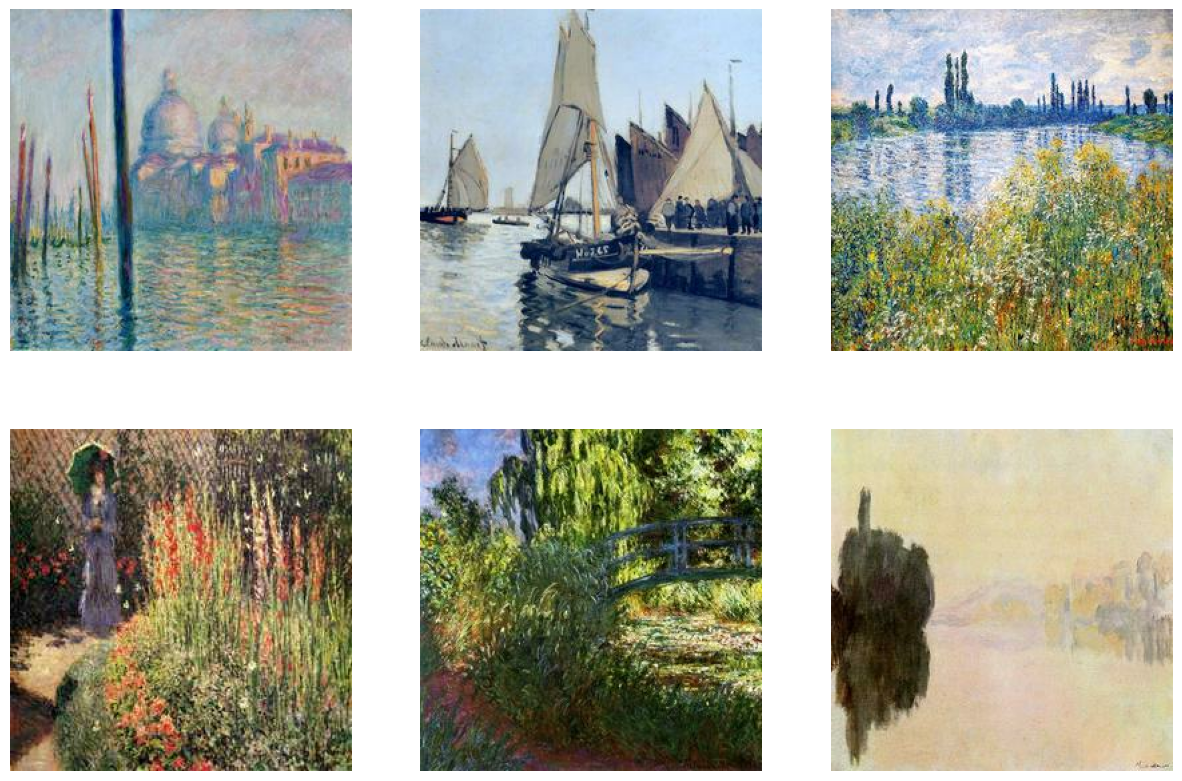

In [52]:
display_samples(monet_ds, 2, 3)

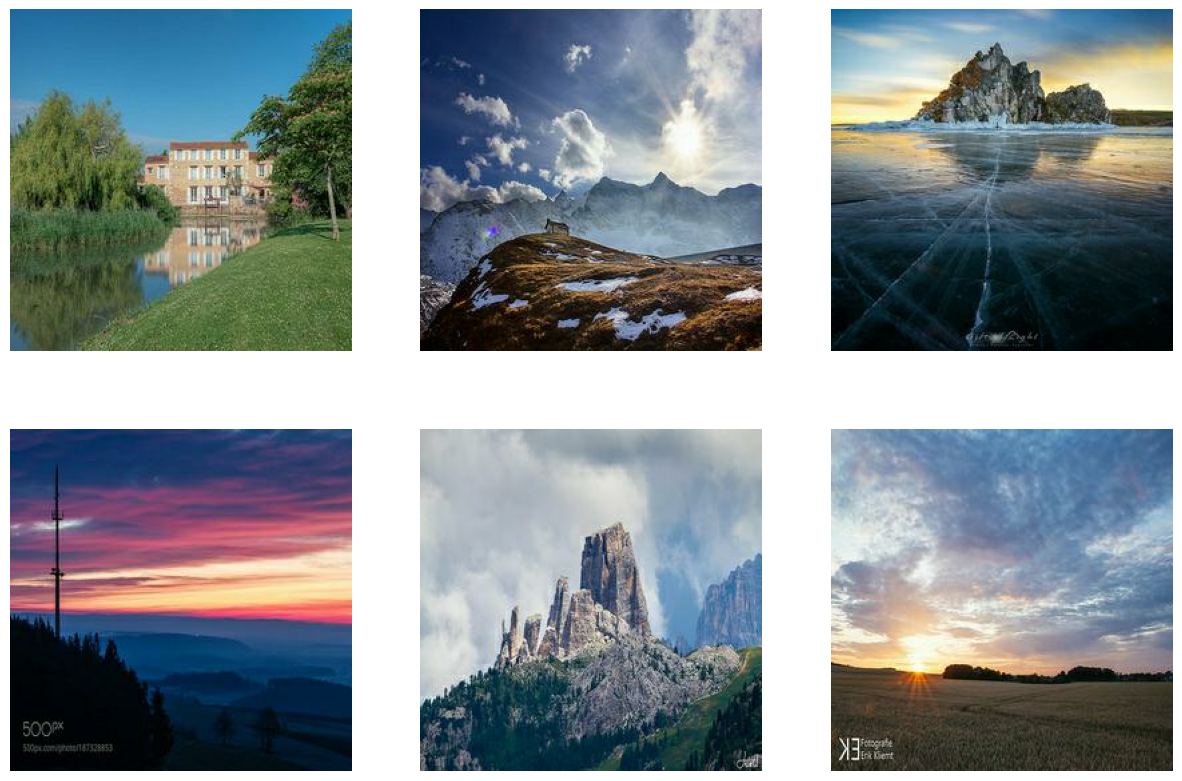

In [54]:
display_samples(photo_ds, 2, 3)

In [55]:
# Monet dataset
print(f'Monet shape: {iter(monet_ds).next().shape}')

# Photo dataset
print(f'Photo shape: {iter(photo_ds).next().shape}')

Monet shape: (1, 256, 256, 3)
Photo shape: (1, 256, 256, 3)


<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Dataset Preparation
</div>

In [56]:
monet_ds = monet_ds.map(lambda x: (x / 127.5) - 1.0)
photo_ds = photo_ds.map(lambda x: (x / 127.5) - 1.0)

<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Model Training
</div>

### Preparation for the Generator and Discriminator

In [57]:
class ReflectionPadding2D(layers.Layer):
    """Implements Reflection Padding as a layer.

    Args:
        padding(tuple): Amount of padding for the
        spatial dimensions.

    Returns:
        A padded tensor with the same type as the input tensor.
    """

    def __init__(self, padding=(1, 1), **kwargs):
        self.padding = tuple(padding)
        super().__init__(**kwargs)

    def call(self, input_tensor, mask=None):
        padding_width, padding_height = self.padding
        padding_tensor = [
            [0, 0],
            [padding_height, padding_height],
            [padding_width, padding_width],
            [0, 0],
        ]
        return ops.pad(input_tensor, padding_tensor, mode="REFLECT")


def residual_block(
    x,
    activation,
    kernel_initializer=kernel_init,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="valid",
    gamma_initializer=gamma_init,
    use_bias=False,
):
    dim = x.shape[-1]
    input_tensor = x

    x = ReflectionPadding2D()(input_tensor)
    x = layers.Conv2D(
        dim,
        kernel_size,
        strides=strides,
        kernel_initializer=kernel_initializer,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = keras.layers.GroupNormalization(groups=1, gamma_initializer=gamma_initializer)(
        x
    )
    x = activation(x)

    x = ReflectionPadding2D()(x)
    x = layers.Conv2D(
        dim,
        kernel_size,
        strides=strides,
        kernel_initializer=kernel_initializer,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = keras.layers.GroupNormalization(groups=1, gamma_initializer=gamma_initializer)(
        x
    )
    x = layers.add([input_tensor, x])
    return x


def downsample(
    x,
    filters,
    activation,
    kernel_initializer=kernel_init,
    kernel_size=(3, 3),
    strides=(2, 2),
    padding="same",
    gamma_initializer=gamma_init,
    use_bias=False,
):
    x = layers.Conv2D(
        filters,
        kernel_size,
        strides=strides,
        kernel_initializer=kernel_initializer,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = keras.layers.GroupNormalization(groups=1, gamma_initializer=gamma_initializer)(
        x
    )
    if activation:
        x = activation(x)
    return x


def upsample(
    x,
    filters,
    activation,
    kernel_size=(3, 3),
    strides=(2, 2),
    padding="same",
    kernel_initializer=kernel_init,
    gamma_initializer=gamma_init,
    use_bias=False,
):
    x = layers.Conv2DTranspose(
        filters,
        kernel_size,
        strides=strides,
        padding=padding,
        kernel_initializer=kernel_initializer,
        use_bias=use_bias,
    )(x)
    x = keras.layers.GroupNormalization(groups=1, gamma_initializer=gamma_initializer)(
        x
    )
    if activation:
        x = activation(x)
    return x

### Build the Generator

In [59]:
def get_resnet_generator(
    filters=64,
    num_downsampling_blocks=2,
    num_residual_blocks=9,
    num_upsample_blocks=2,
    gamma_initializer=gamma_init,
    name=None,
):
    img_input = layers.Input(shape=input_img_size, name=name + "_img_input")
    x = ReflectionPadding2D(padding=(3, 3))(img_input)
    x = layers.Conv2D(filters, (7, 7), kernel_initializer=kernel_init, use_bias=False)(
        x
    )
    x = keras.layers.GroupNormalization(groups=1, gamma_initializer=gamma_initializer)(
        x
    )
    x = layers.Activation("relu")(x)

    # Downsampling
    for _ in range(num_downsampling_blocks):
        filters *= 2
        x = downsample(x, filters=filters, activation=layers.Activation("relu"))

    # Residual blocks
    for _ in range(num_residual_blocks):
        x = residual_block(x, activation=layers.Activation("relu"))

    # Upsampling
    for _ in range(num_upsample_blocks):
        filters //= 2
        x = upsample(x, filters, activation=layers.Activation("relu"))

    # Final block
    x = ReflectionPadding2D(padding=(3, 3))(x)
    x = layers.Conv2D(3, (7, 7), padding="valid")(x)
    x = layers.Activation("tanh")(x)

    model = keras.models.Model(img_input, x, name=name)
    return model

### Build the Discriminator

In [60]:
def get_discriminator(
    filters=64, kernel_initializer=kernel_init, num_downsampling=3, name=None
):
    img_input = layers.Input(shape=input_img_size, name=name + "_img_input")
    x = layers.Conv2D(
        filters,
        (4, 4),
        strides=(2, 2),
        padding="same",
        kernel_initializer=kernel_initializer,
    )(img_input)
    x = layers.LeakyReLU(0.2)(x)

    num_filters = filters
    for num_downsample_block in range(3):
        num_filters *= 2
        if num_downsample_block < 2:
            x = downsample(
                x,
                filters=num_filters,
                activation=layers.LeakyReLU(0.2),
                kernel_size=(4, 4),
                strides=(2, 2),
            )
        else:
            x = downsample(
                x,
                filters=num_filters,
                activation=layers.LeakyReLU(0.2),
                kernel_size=(4, 4),
                strides=(1, 1),
            )

    x = layers.Conv2D(
        1, (4, 4), strides=(1, 1), padding="same", kernel_initializer=kernel_initializer
    )(x)

    model = keras.models.Model(inputs=img_input, outputs=x, name=name)
    return model


# Get the generators
gen_G = get_resnet_generator(name="generator_G")
gen_F = get_resnet_generator(name="generator_F")

# Get the discriminators
disc_X = get_discriminator(name="discriminator_X")
disc_Y = get_discriminator(name="discriminator_Y")

### Build the CycleGAN Model

In [61]:
class CycleGan(keras.Model):
    def __init__(
        self,
        generator_G,
        generator_F,
        discriminator_X,
        discriminator_Y,
        lambda_cycle=10.0,
        lambda_identity=0.5,
    ):
        super().__init__()
        self.gen_G = generator_G
        self.gen_F = generator_F
        self.disc_X = discriminator_X
        self.disc_Y = discriminator_Y
        self.lambda_cycle = lambda_cycle
        self.lambda_identity = lambda_identity

    def call(self, inputs):
        return (
            self.disc_X(inputs),
            self.disc_Y(inputs),
            self.gen_G(inputs),
            self.gen_F(inputs),
        )

    def compile(
        self,
        gen_G_optimizer,
        gen_F_optimizer,
        disc_X_optimizer,
        disc_Y_optimizer,
        gen_loss_fn,
        disc_loss_fn,
    ):
        super().compile()
        self.gen_G_optimizer = gen_G_optimizer
        self.gen_F_optimizer = gen_F_optimizer
        self.disc_X_optimizer = disc_X_optimizer
        self.disc_Y_optimizer = disc_Y_optimizer
        self.generator_loss_fn = gen_loss_fn
        self.discriminator_loss_fn = disc_loss_fn
        self.cycle_loss_fn = keras.losses.MeanAbsoluteError()
        self.identity_loss_fn = keras.losses.MeanAbsoluteError()

    def train_step(self, batch_data):
        # x is Horse and y is zebra
        real_x, real_y = batch_data

        # For CycleGAN, we need to calculate different
        # kinds of losses for the generators and discriminators.
        # We will perform the following steps here:
        #
        # 1. Pass real images through the generators and get the generated images
        # 2. Pass the generated images back to the generators to check if we
        #    can predict the original image from the generated image.
        # 3. Do an identity mapping of the real images using the generators.
        # 4. Pass the generated images in 1) to the corresponding discriminators.
        # 5. Calculate the generators total loss (adversarial + cycle + identity)
        # 6. Calculate the discriminators loss
        # 7. Update the weights of the generators
        # 8. Update the weights of the discriminators
        # 9. Return the losses in a dictionary

        with tf.GradientTape(persistent=True) as tape:
            # Horse to fake zebra
            fake_y = self.gen_G(real_x, training=True)
            # Zebra to fake horse -> y2x
            fake_x = self.gen_F(real_y, training=True)

            # Cycle (Horse to fake zebra to fake horse): x -> y -> x
            cycled_x = self.gen_F(fake_y, training=True)
            # Cycle (Zebra to fake horse to fake zebra) y -> x -> y
            cycled_y = self.gen_G(fake_x, training=True)

            # Identity mapping
            same_x = self.gen_F(real_x, training=True)
            same_y = self.gen_G(real_y, training=True)

            # Discriminator output
            disc_real_x = self.disc_X(real_x, training=True)
            disc_fake_x = self.disc_X(fake_x, training=True)

            disc_real_y = self.disc_Y(real_y, training=True)
            disc_fake_y = self.disc_Y(fake_y, training=True)

            # Generator adversarial loss
            gen_G_loss = self.generator_loss_fn(disc_fake_y)
            gen_F_loss = self.generator_loss_fn(disc_fake_x)

            # Generator cycle loss
            cycle_loss_G = self.cycle_loss_fn(real_y, cycled_y) * self.lambda_cycle
            cycle_loss_F = self.cycle_loss_fn(real_x, cycled_x) * self.lambda_cycle

            # Generator identity loss
            id_loss_G = (
                self.identity_loss_fn(real_y, same_y)
                * self.lambda_cycle
                * self.lambda_identity
            )
            id_loss_F = (
                self.identity_loss_fn(real_x, same_x)
                * self.lambda_cycle
                * self.lambda_identity
            )

            # Total generator loss
            total_loss_G = gen_G_loss + cycle_loss_G + id_loss_G
            total_loss_F = gen_F_loss + cycle_loss_F + id_loss_F

            # Discriminator loss
            disc_X_loss = self.discriminator_loss_fn(disc_real_x, disc_fake_x)
            disc_Y_loss = self.discriminator_loss_fn(disc_real_y, disc_fake_y)

        # Get the gradients for the generators
        grads_G = tape.gradient(total_loss_G, self.gen_G.trainable_variables)
        grads_F = tape.gradient(total_loss_F, self.gen_F.trainable_variables)

        # Get the gradients for the discriminators
        disc_X_grads = tape.gradient(disc_X_loss, self.disc_X.trainable_variables)
        disc_Y_grads = tape.gradient(disc_Y_loss, self.disc_Y.trainable_variables)

        # Update the weights of the generators
        self.gen_G_optimizer.apply_gradients(
            zip(grads_G, self.gen_G.trainable_variables)
        )
        self.gen_F_optimizer.apply_gradients(
            zip(grads_F, self.gen_F.trainable_variables)
        )

        # Update the weights of the discriminators
        self.disc_X_optimizer.apply_gradients(
            zip(disc_X_grads, self.disc_X.trainable_variables)
        )
        self.disc_Y_optimizer.apply_gradients(
            zip(disc_Y_grads, self.disc_Y.trainable_variables)
        )

        return {
            "G_loss": total_loss_G,
            "F_loss": total_loss_F,
            "D_X_loss": disc_X_loss,
            "D_Y_loss": disc_Y_loss,
        }

### Create a callback that periodically saves generated images

In [68]:
class GANMonitor(keras.callbacks.Callback):
    """A callback to generate and save images after each epoch"""

    def __init__(self, num_img=4):
        self.num_img = num_img
        self.save_dir = "generated_images"
        os.makedirs(self.save_dir, exist_ok=True)

    def on_epoch_end(self, epoch, logs=None):
        _, ax = plt.subplots(4, 2, figsize=(12, 12))
        for i, img in enumerate(photo_ds.take(self.num_img)):
            prediction = self.model.gen_G(img)[0].numpy()
            prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
            img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

            ax[i, 0].imshow(img)
            ax[i, 1].imshow(prediction)
            ax[i, 0].set_title("Input image")
            ax[i, 1].set_title("Translated image")
            ax[i, 0].axis("off")
            ax[i, 1].axis("off")

            prediction = keras.utils.array_to_img(prediction)
            prediction.save(
                os.path.join(self.save_dir, f"generated_img_{i}_{epoch + 1}.png")
            )
        plt.show()
        plt.close()


### Train the End-to-End Model

Epoch 1/90


300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - D_X_loss: 0.0674 - D_Y_loss: 0.1280 - F_loss: 4.1920 - G_loss: 3.8716

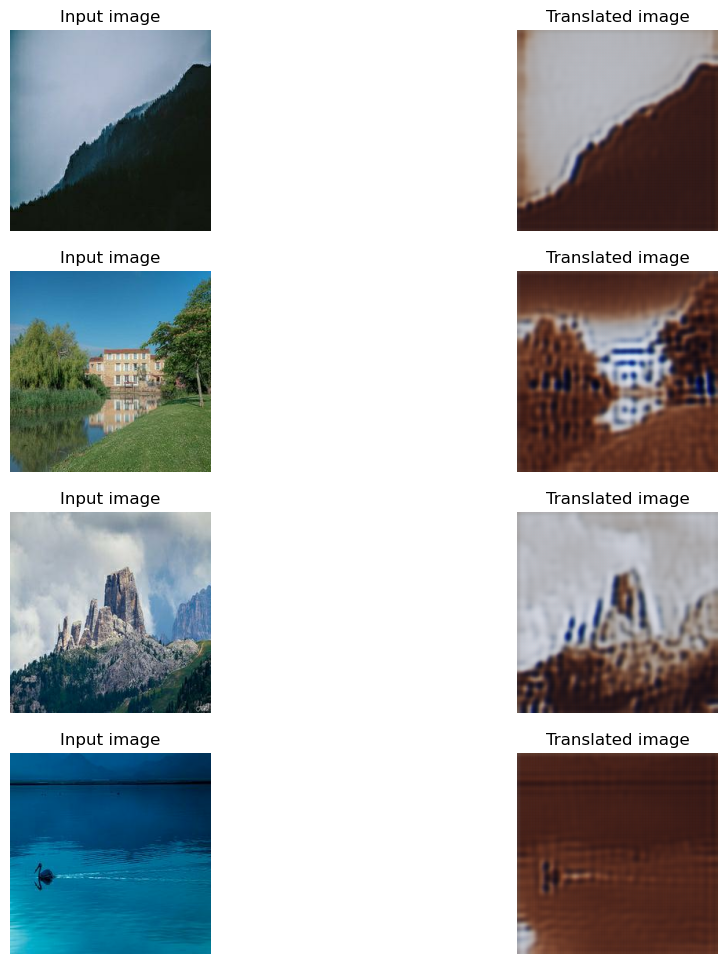

300/300 ━━━━━━━━━━━━━━━━━━━━ 875s 3s/step - D_X_loss: 0.0674 - D_Y_loss: 0.1277 - F_loss: 4.1905 - G_loss: 3.8685
Epoch 2/90
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - D_X_loss: 0.0837 - D_Y_loss: 0.1241 - F_loss: 4.0913 - G_loss: 3.7343

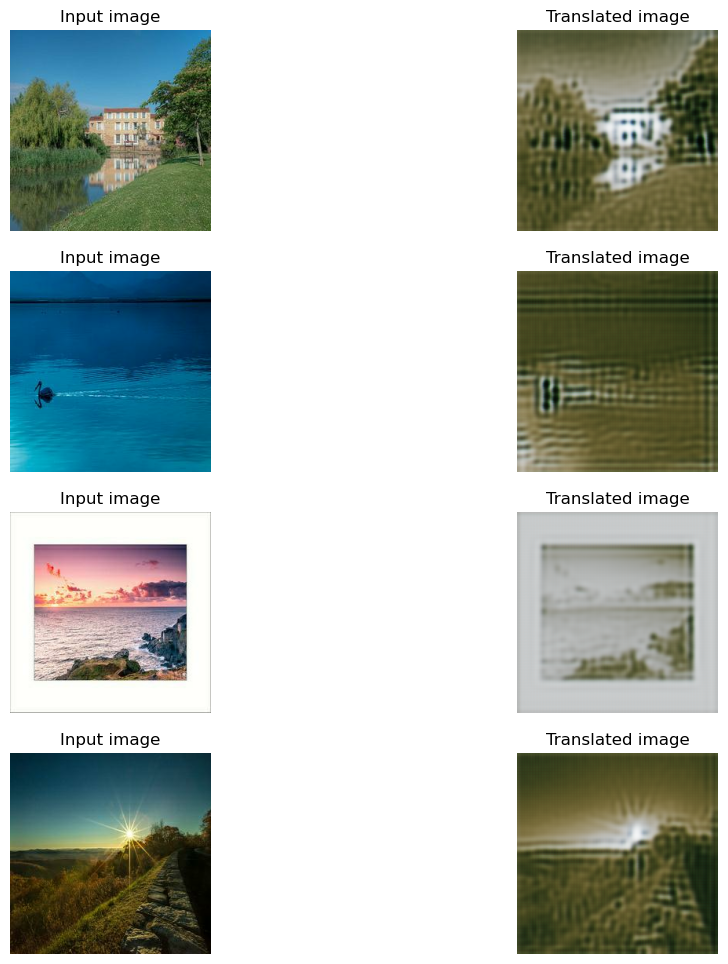

300/300 ━━━━━━━━━━━━━━━━━━━━ 796s 3s/step - D_X_loss: 0.0836 - D_Y_loss: 0.1237 - F_loss: 4.0888 - G_loss: 3.7323
Epoch 3/90
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - D_X_loss: 0.1374 - D_Y_loss: 0.1045 - F_loss: 3.9288 - G_loss: 3.7338

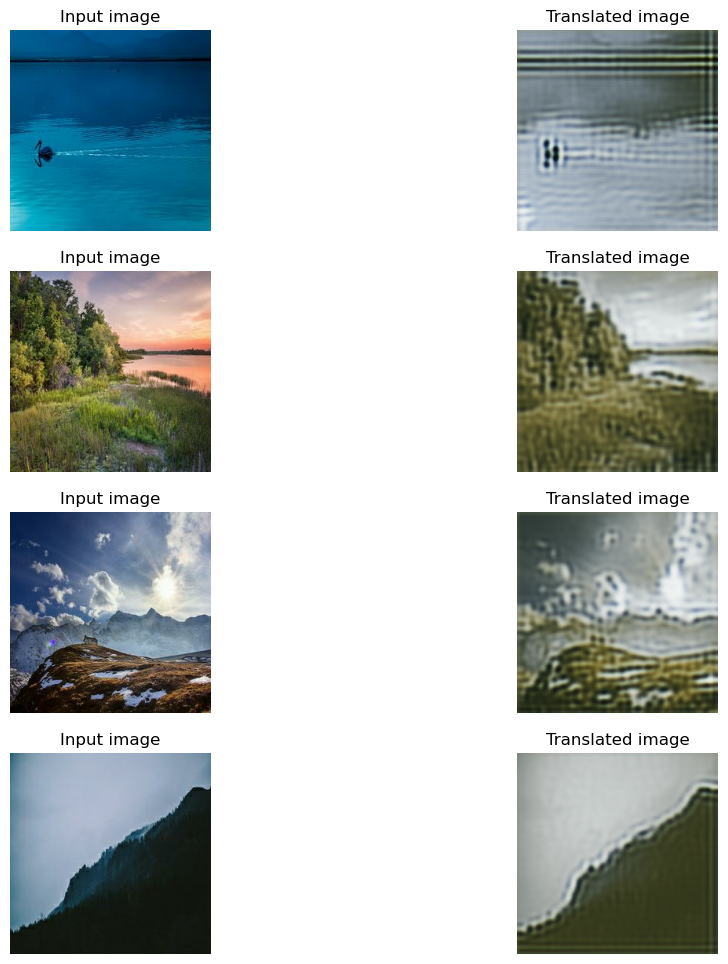

300/300 ━━━━━━━━━━━━━━━━━━━━ 988s 3s/step - D_X_loss: 0.1370 - D_Y_loss: 0.1055 - F_loss: 3.9308 - G_loss: 3.7289
Epoch 4/90
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - D_X_loss: 0.1474 - D_Y_loss: 0.1405 - F_loss: 3.2349 - G_loss: 3.1699

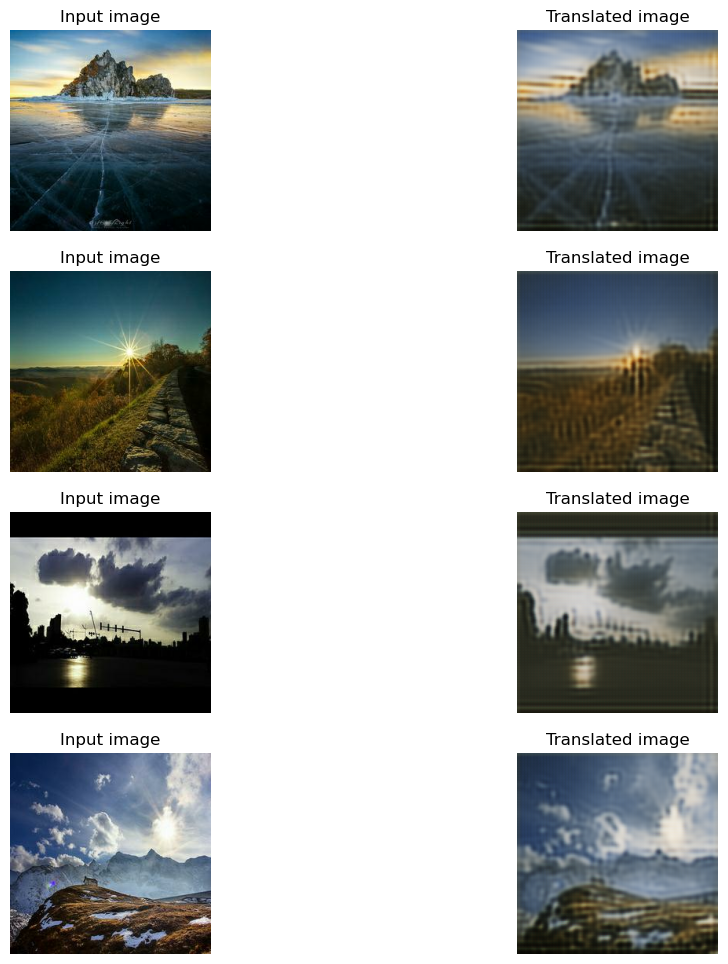

300/300 ━━━━━━━━━━━━━━━━━━━━ 789s 3s/step - D_X_loss: 0.1471 - D_Y_loss: 0.1401 - F_loss: 3.2357 - G_loss: 3.1693
Epoch 5/90
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - D_X_loss: 0.1351 - D_Y_loss: 0.0753 - F_loss: 3.0648 - G_loss: 3.1777

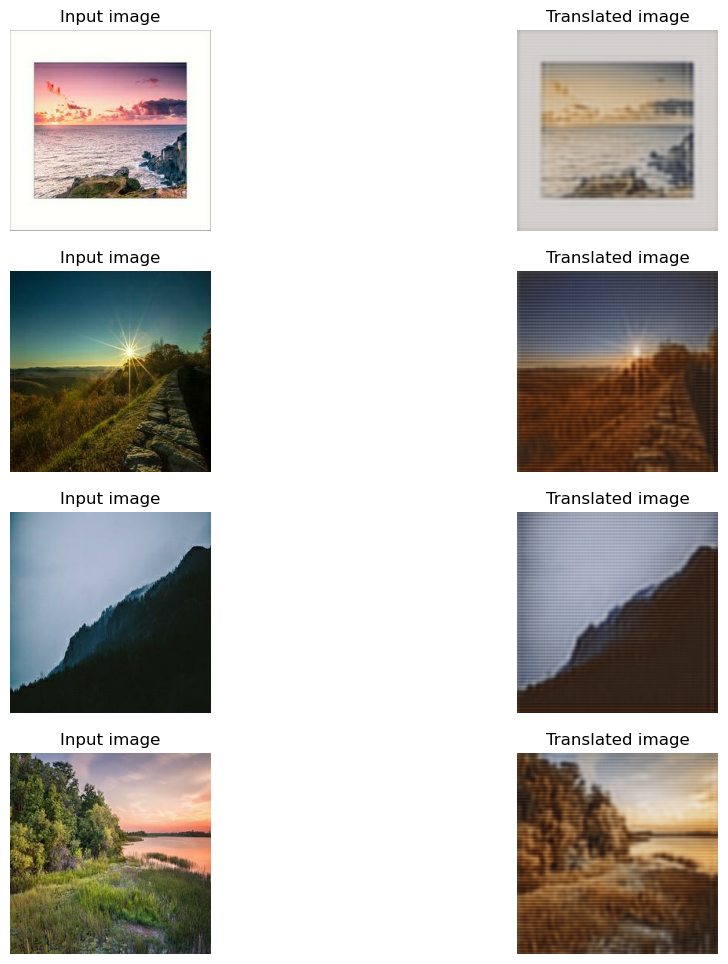

300/300 ━━━━━━━━━━━━━━━━━━━━ 871s 3s/step - D_X_loss: 0.1356 - D_Y_loss: 0.0752 - F_loss: 3.0631 - G_loss: 3.1771
Epoch 6/90
200/300 ━━━━━━━━━━━━━━━━━━━━ 4:52 3s/step - D_X_loss: 0.1388 - D_Y_loss: 0.0756 - F_loss: 3.0333 - G_loss: 3.1658

KeyboardInterrupt: 

In [67]:
# Loss function for evaluating adversarial loss
adv_loss_fn = keras.losses.MeanSquaredError()

# Define the loss function for the generators


def generator_loss_fn(fake):
    fake_loss = adv_loss_fn(ops.ones_like(fake), fake)
    return fake_loss


# Define the loss function for the discriminators
def discriminator_loss_fn(real, fake):
    real_loss = adv_loss_fn(ops.ones_like(real), real)
    fake_loss = adv_loss_fn(ops.zeros_like(fake), fake)
    return (real_loss + fake_loss) * 0.5


# Create cycle gan model
cycle_gan_model = CycleGan(
    generator_G=gen_G, generator_F=gen_F, discriminator_X=disc_X, discriminator_Y=disc_Y
)

# Compile the model
cycle_gan_model.compile(
    gen_G_optimizer=keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
    gen_F_optimizer=keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
    disc_X_optimizer=keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
    disc_Y_optimizer=keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
    gen_loss_fn=generator_loss_fn,
    disc_loss_fn=discriminator_loss_fn,
)

# Explicitly build the model before training
# The input shape should match the shape of your images, e.g., (256, 256, 3)
# The 'None' dimension is for the batch size, which can be variable.
input_shape = (None, 256, 256, 3)
cycle_gan_model.build(input_shape=[input_shape, input_shape])


# Callbacks
plotter = GANMonitor()
checkpoint_filepath = "./model_checkpoints/cyclegan_checkpoints.weights.h5"
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, save_weights_only=True
)

# Here we will train the model for just one epoch as each epoch takes around
# 7 minutes on a single P100 backed machine.
cycle_gan_model.fit(
    tf.data.Dataset.zip((photo_ds, monet_ds)),
    epochs=90,
    callbacks=[plotter, model_checkpoint_callback],
)

### Test the performance of the model

In [ ]:
# Once the weights are loaded, we will take a few samples from the test data and check the model's performance.


# Load the checkpoints
cycle_gan_model.load_weights(checkpoint_filepath)
print("Weights loaded successfully")

_, ax = plt.subplots(4, 2, figsize=(10, 15))
for i, img in enumerate(test_horses.take(4)):
    prediction = cycle_gan_model.gen_G(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input image")
    ax[i, 0].set_title("Input image")
    ax[i, 1].set_title("Translated image")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")

    prediction = keras.utils.array_to_img(prediction)
    prediction.save("predicted_img_{i}.png".format(i=i))
plt.tight_layout()
plt.show()

<div style="background-color: magenta; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Results and Analysis

</div>

#### Submission Generation

<div style="background-color: #013a63; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Project Conclusion and Summary
</div>